# AP(P)3RO PROJECT #

### Projet de deneigement intelligent de Montréal, Canada ###

#### M. Le Gras, A. Naullet, A. Calixte, P. Beaunieux ####

In [11]:
import multiprocessing as mp

import numpy as np
import osmnx as ox

## Partie 1: Cartographie de la ville par le drone ##

In [90]:
place = "Le Perrier, France" # /!\ Replace with Montreal
G = ox.graph_from_place(place, network_type="walk")
#Gp = ox.project_graph(G)

### 1.1: Importation des plans de la ville ###

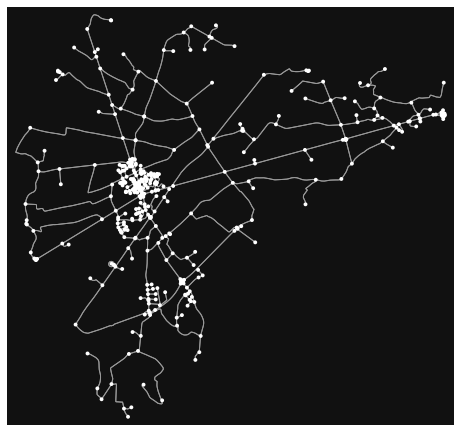

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [91]:
ox.plot_graph(G)

In [92]:
#node1 =list(G.nodes(data=True))[2][0]
#node2 =list(G.nodes(data=True))[42][0]
#print(list(G.nodes(data=True))[2:4])
#print(node1, node2)
node_list = list(G.edges(data=True))
print(node_list)

[(297793040, 297793041, {'osmid': 27142195, 'name': 'Porte de Saint-Jean', 'highway': 'primary', 'junction': 'roundabout', 'oneway': False, 'length': 25.385, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3508027e80>}), (297793040, 310009666, {'osmid': 27142195, 'name': 'Porte de Saint-Jean', 'highway': 'primary', 'junction': 'roundabout', 'oneway': False, 'length': 29.205000000000002, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3508027ac0>}), (297793040, 2992100588, {'osmid': 27142197, 'oneway': False, 'ref': 'D 753', 'highway': 'secondary', 'maxspeed': '70', 'length': 111.99, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3508027a90>}), (297793041, 297793042, {'osmid': 27142195, 'name': 'Porte de Saint-Jean', 'highway': 'primary', 'junction': 'roundabout', 'oneway': False, 'length': 17.679000000000002, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3508027940>}), (297793041, 297793040, {'osmid': 27142195, 

In [93]:
### Construction d'une liste de noeud qui a notre format
graph_city = []
for node in node_list:
    n1 = node[0]
    n2 = node[1]
    dist = node[2]["length"]
    graph_city.append((n1,n2,dist))
### On ne peut pas utiliser l'id des noeuds pour utiliser nos algos.
### On doit construire une table de correspondance entre l'id des noeuds et des numéros croissants de noeuds
CORRESPONDENCE_TABLE = []

def is_in_corr_table(node_id):
    for (s_id, n_id) in CORRESPONDENCE_TABLE:
        if n_id == node_id:
            return s_id
    return -1

def get_true_node(soft_id):
    for (s_id, n_id) in CORRESPONDENCE_TABLE:
        if s_id == soft_id:
            return n_id
    return -1

def to_soft_id_graph(graph_city):
    graph_city_soft_id = []
    soft_id = 1
    for (node1,node2,dist) in graph_city:
        s_id1 = is_in_corr_table(node1)
        s_id2 = is_in_corr_table(node2)
        if s_id1 == -1 :
            s_id1 = soft_id
            CORRESPONDENCE_TABLE.append((s_id1, node1))
            soft_id += 1
        if s_id2 == -1 :
            s_id2 = soft_id
            CORRESPONDENCE_TABLE.append((s_id2, node2))
            soft_id += 1
    
        graph_city_soft_id.append((s_id1,s_id2, dist))
    return graph_city_soft_id

def to_real_id_graph(graph_city_soft_id):
    graph_city = []
    soft_id = 1
    for (node1,node2,dist) in graph_city_soft_id:
        n_id1 = get_true_node(node1)
        n_id2 = get_true_node(node2)
    
        graph_city.append((n_id1,n_id2, dist))
    return graph_city

def to_real_id_path(path_soft_id):
    path = []
    soft_id = 1
    for (node1,node2) in path_soft_id:
        n_id1 = get_true_node(node1)
        n_id2 = get_true_node(node2)
    
        path.append(n_id1)
    return path

graph_city_soft_id = to_soft_id_graph(graph_city)
graph_city2 = to_real_id_graph(graph_city_soft_id)

### On verifie que la conversion des graphes est OK
print("Conversion, re-conversion des graphs: ", ("Erreur","OK")[graph_city == graph_city2])

Conversion, re-conversion des graphs:  OK


In [94]:
print(graph_city_soft_id)

[(1, 2, 25.385), (1, 3, 29.205000000000002), (1, 4, 111.99), (2, 5, 17.679000000000002), (2, 1, 25.385), (2, 6, 159.685), (5, 7, 24.497), (5, 2, 17.679000000000002), (5, 8, 51.457), (7, 9, 29.818), (7, 5, 24.497), (7, 8, 51.29600000000001), (9, 10, 28.581999999999997), (9, 7, 29.818), (10, 11, 14.725000000000001), (10, 9, 28.582), (11, 3, 23.14), (11, 10, 14.725000000000001), (11, 12, 59.021), (6, 2, 159.68500000000003), (6, 4, 46.616), (6, 13, 254.63), (14, 15, 68.87700000000001), (14, 16, 144.09), (14, 17, 75.339), (12, 11, 59.021), (12, 3, 56.389), (3, 1, 29.205), (3, 11, 23.14), (3, 12, 56.388999999999996), (18, 19, 7.494), (18, 20, 12.081), (18, 21, 66.181), (20, 22, 10.047), (20, 18, 12.081), (20, 23, 36.906000000000006), (22, 20, 10.047), (22, 24, 42.646), (22, 25, 14.991), (26, 25, 6.794), (26, 27, 43.654), (26, 28, 15.935), (29, 28, 5.835), (29, 19, 14.132), (29, 30, 71.179), (21, 23, 26.996), (21, 18, 66.181), (21, 31, 77.417), (19, 18, 7.494), (19, 29, 14.132), (19, 30, 77.1

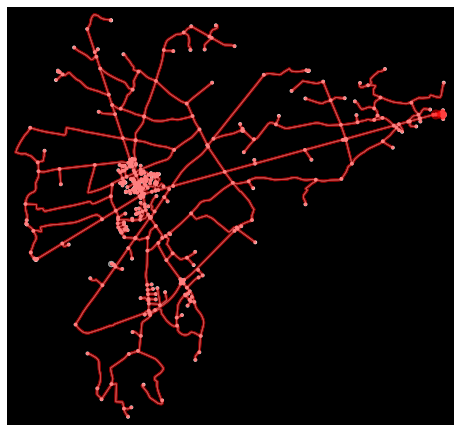

In [95]:
path = [(1, 2), (2, 5), (5, 7), (7, 9), (9, 10), (10, 11), (11, 3), (3, 1), (1, 4), (4, 6), (6, 2), (2, 1), (1, 3), (3, 12), (12, 11), (11, 3), (3, 12), (12, 11), (11, 10), (10, 9), (9, 7), (7, 5), (5, 8), (8, 7), (7, 8), (8, 5), (5, 2), (2, 6), (6, 13), (13, 92), (92, 93), (93, 291), (291, 93), (93, 97), (97, 94), (94, 92), (92, 94), (94, 95), (95, 98), (98, 100), (100, 102), (102, 103), (103, 104), (104, 102), (102, 104), (104, 61), (61, 60), (60, 62), (62, 301), (301, 300), (300, 297), (297, 298), (298, 300), (300, 301), (301, 302), (302, 301), (301, 62), (62, 405), (405, 62), (62, 60), (60, 63), (63, 356), (356, 355), (355, 287), (287, 285), (285, 274), (274, 273), (273, 274), (274, 280), (280, 281), (281, 288), (288, 290), (290, 288), (288, 97), (97, 288), (288, 281), (281, 103), (103, 281), (281, 280), (280, 282), (282, 280), (280, 274), (274, 285), (285, 270), (270, 269), (269, 271), (271, 276), (276, 275), (275, 277), (277, 279), (279, 275), (275, 278), (278, 371), (371, 370), (370, 371), (371, 357), (357, 355), (355, 287), (287, 285), (285, 270), (270, 269), (269, 272), (272, 269), (269, 271), (271, 286), (286, 271), (271, 276), (276, 283), (283, 336), (336, 334), (334, 333), (333, 335), (335, 402), (402, 335), (335, 404), (404, 335), (335, 333), (333, 236), (236, 227), (227, 226), (226, 228), (228, 257), (257, 218), (218, 215), (215, 216), (216, 224), (224, 213), (213, 212), (212, 214), (214, 239), (239, 240), (240, 239), (239, 241), (241, 244), (244, 241), (241, 244), (244, 245), (245, 244), (244, 241), (241, 239), (239, 206), (206, 204), (204, 205), (205, 204), (204, 194), (194, 192), (192, 193), (193, 192), (192, 185), (185, 184), (184, 186), (186, 184), (184, 187), (187, 182), (182, 180), (180, 181), (181, 180), (180, 183), (183, 188), (188, 203), (203, 201), (201, 202), (202, 209), (209, 207), (207, 208), (208, 207), (207, 210), (210, 211), (211, 210), (210, 395), (395, 210), (210, 207), (207, 209), (209, 249), (249, 248), (248, 229), (229, 226), (226, 227), (227, 237), (237, 248), (248, 229), (229, 205), (205, 242), (242, 202), (202, 201), (201, 199), (199, 190), (190, 189), (189, 190), (190, 197), (197, 203), (203, 201), (201, 199), (199, 200), (200, 57), (57, 48), (48, 45), (45, 46), (46, 55), (55, 54), (54, 51), (51, 50), (50, 49), (49, 47), (47, 45), (45, 47), (47, 48), (48, 47), (47, 49), (49, 52), (52, 50), (50, 51), (51, 53), (53, 54), (54, 53), (53, 51), (51, 54), (54, 55), (55, 16), (16, 14), (14, 15), (15, 17), (17, 14), (14, 16), (16, 46), (46, 55), (55, 16), (16, 46), (46, 45), (45, 48), (48, 57), (57, 196), (196, 57), (57, 200), (200, 409), (409, 200), (200, 199), (199, 190), (190, 198), (198, 393), (393, 392), (392, 393), (393, 394), (394, 393), (393, 198), (198, 197), (197, 198), (198, 190), (190, 197), (197, 203), (203, 188), (188, 410), (410, 188), (188, 183), (183, 180), (180, 182), (182, 191), (191, 182), (182, 187), (187, 391), (391, 187), (187, 184), (184, 185), (185, 192), (192, 194), (194, 204), (204, 206), (206, 247), (247, 206), (206, 239), (239, 214), (214, 265), (265, 214), (214, 212), (212, 213), (213, 225), (225, 252), (252, 78), (78, 75), (75, 76), (76, 81), (81, 79), (79, 80), (80, 83), (83, 85), (85, 77), (77, 75), (75, 77), (77, 86), (86, 236), (236, 227), (227, 237), (237, 248), (248, 249), (249, 242), (242, 249), (249, 209), (209, 202), (202, 242), (242, 205), (205, 229), (229, 226), (226, 228), (228, 374), (374, 228), (228, 257), (257, 373), (373, 257), (257, 218), (218, 258), (258, 218), (218, 215), (215, 217), (217, 215), (215, 216), (216, 256), (256, 216), (216, 224), (224, 238), (238, 390), (390, 238), (238, 403), (403, 238), (238, 224), (224, 213), (213, 225), (225, 263), (263, 233), (233, 232), (232, 220), (220, 219), (219, 221), (221, 223), (223, 230), (230, 250), (250, 230), (230, 264), (264, 230), (230, 223), (223, 231), (231, 235), (235, 353), (353, 235), (235, 231), (231, 223), (223, 221), (221, 219), (219, 222), (222, 246), (246, 222), (222, 219), (219, 220), (220, 251), (251, 220), (220, 232), (232, 234), (234, 232), (232, 233), (233, 252), (252, 225), (225, 233), (233, 225), (225, 263), (263, 233), (233, 252), (252, 78), (78, 76), (76, 78), (78, 75), (75, 76), (76, 81), (81, 79), (79, 82), (82, 81), (81, 82), (82, 87), (87, 88), (88, 91), (91, 67), (67, 65), (65, 66), (66, 65), (65, 67), (67, 234), (234, 243), (243, 90), (90, 88), (88, 90), (90, 253), (253, 259), (259, 253), (253, 260), (260, 261), (261, 260), (260, 255), (255, 254), (254, 255), (255, 260), (260, 253), (253, 90), (90, 243), (243, 262), (262, 243), (243, 234), (234, 67), (67, 91), (91, 255), (255, 91), (91, 88), (88, 87), (87, 89), (89, 339), (339, 338), (338, 339), (339, 89), (89, 87), (87, 82), (82, 79), (79, 80), (80, 84), (84, 83), (83, 80), (80, 84), (84, 351), (351, 69), (69, 68), (68, 70), (70, 351), (351, 70), (70, 69), (69, 340), (340, 284), (284, 276), (276, 284), (284, 340), (340, 283), (283, 340), (340, 69), (69, 70), (70, 354), (354, 70), (70, 68), (68, 69), (69, 351), (351, 84), (84, 83), (83, 85), (85, 77), (77, 86), (86, 85), (85, 86), (86, 236), (236, 333), (333, 334), (334, 237), (237, 334), (334, 336), (336, 337), (337, 336), (336, 283), (283, 276), (276, 275), (275, 277), (277, 139), (139, 137), (137, 136), (136, 135), (135, 34), (34, 31), (31, 21), (21, 18), (18, 19), (19, 29), (29, 28), (28, 26), (26, 25), (25, 22), (22, 20), (20, 18), (18, 20), (20, 23), (23, 21), (21, 18), (18, 19), (19, 29), (29, 30), (30, 19), (19, 30), (30, 58), (58, 30), (30, 59), (59, 30), (30, 29), (29, 28), (28, 26), (26, 27), (27, 28), (28, 27), (27, 26), (26, 25), (25, 24), (24, 22), (22, 20), (20, 23), (23, 147), (147, 143), (143, 141), (141, 142), (142, 141), (141, 127), (127, 39), (39, 36), (36, 37), (37, 114), (114, 117), (117, 111), (111, 110), (110, 108), (108, 107), (107, 108), (108, 105), (105, 43), (43, 42), (42, 40), (40, 38), (38, 36), (36, 38), (38, 41), (41, 168), (168, 169), (169, 41), (41, 168), (168, 170), (170, 172), (172, 171), (171, 168), (168, 170), (170, 173), (173, 170), (170, 172), (172, 174), (174, 171), (171, 168), (168, 169), (169, 176), (176, 175), (175, 176), (176, 177), (177, 178), (178, 177), (177, 179), (179, 177), (177, 176), (176, 169), (169, 41), (41, 38), (38, 40), (40, 110), (110, 108), (108, 105), (105, 109), (109, 128), (128, 124), (124, 120), (120, 119), (119, 121), (121, 109), (109, 105), (105, 43), (43, 53), (53, 43), (43, 106), (106, 43), (43, 42), (42, 44), (44, 166), (166, 163), (163, 162), (162, 164), (164, 161), (161, 158), (158, 159), (159, 158), (158, 160), (160, 158), (158, 161), (161, 397), (397, 161), (161, 164), (164, 411), (411, 164), (164, 162), (162, 165), (165, 162), (162, 163), (163, 406), (406, 163), (163, 166), (166, 167), (167, 174), (174, 171), (171, 172), (172, 174), (174, 167), (167, 417), (417, 418), (418, 421), (421, 419), (419, 413), (413, 412), (412, 414), (414, 415), (415, 412), (412, 414), (414, 416), (416, 419), (419, 420), (420, 413), (413, 412), (412, 415), (415, 417), (417, 415), (415, 414), (414, 416), (416, 418), (418, 416), (416, 419), (419, 413), (413, 420), (420, 421), (421, 420), (420, 419), (419, 421), (421, 418), (418, 417), (417, 167), (167, 166), (166, 44), (44, 382), (382, 382), (382, 382), (382, 44), (44, 383), (383, 44), (44, 42), (42, 40), (40, 110), (110, 111), (111, 115), (115, 37), (37, 36), (36, 39), (39, 126), (126, 132), (132, 126), (126, 130), (130, 118), (118, 117), (117, 113), (113, 112), (112, 113), (113, 408), (408, 113), (113, 117), (117, 111), (111, 115), (115, 116), (116, 115), (115, 37), (37, 114), (114, 423), (423, 114), (114, 117), (117, 118), (118, 129), (129, 133), (133, 129), (129, 122), (122, 119), (119, 120), (120, 123), (123, 125), (125, 123), (123, 122), (122, 123), (123, 120), (120, 124), (124, 121), (121, 109), (109, 128), (128, 375), (375, 128), (128, 17), (17, 328), (328, 279), (279, 328), (328, 15), (15, 328), (328, 17), (17, 14), (14, 15), (15, 17), (17, 128), (128, 124), (124, 121), (121, 119), (119, 122), (122, 129), (129, 134), (134, 129), (129, 118), (118, 130), (130, 131), (131, 130), (130, 126), (126, 39), (39, 127), (127, 34), (34, 31), (31, 21), (21, 23), (23, 147), (147, 149), (149, 147), (147, 143), (143, 146), (146, 143), (143, 141), (141, 127), (127, 34), (34, 135), (135, 148), (148, 135), (135, 136), (136, 138), (138, 58), (58, 150), (150, 35), (35, 31), (31, 35), (35, 150), (150, 35), (35, 150), (150, 58), (58, 138), (138, 318), (318, 319), (319, 322), (322, 316), (316, 314), (314, 315), (315, 314), (314, 317), (317, 323), (323, 322), (322, 316), (316, 313), (313, 312), (312, 313), (313, 309), (309, 308), (308, 309), (309, 310), (310, 311), (311, 348), (348, 349), (349, 348), (348, 350), (350, 348), (348, 311), (311, 401), (401, 311), (311, 310), (310, 309), (309, 313), (313, 316), (316, 321), (321, 320), (320, 321), (321, 140), (140, 137), (137, 136), (136, 138), (138, 318), (318, 32), (32, 27), (27, 32), (32, 318), (318, 319), (319, 140), (140, 319), (319, 322), (322, 323), (323, 324), (324, 325), (325, 32), (32, 327), (327, 329), (329, 73), (73, 71), (71, 33), (33, 24), (24, 25), (25, 22), (22, 24), (24, 33), (33, 72), (72, 142), (142, 144), (144, 387), (387, 385), (385, 384), (384, 385), (385, 386), (386, 388), (388, 386), (386, 385), (385, 387), (387, 389), (389, 387), (387, 144), (144, 386), (386, 144), (144, 142), (142, 145), (145, 151), (151, 145), (145, 152), (152, 376), (376, 152), (152, 377), (377, 378), (378, 377), (377, 379), (379, 377), (377, 152), (152, 145), (145, 142), (142, 72), (72, 153), (153, 154), (154, 153), (153, 155), (155, 153), (153, 72), (72, 33), (33, 71), (71, 74), (74, 71), (71, 73), (73, 154), (154, 360), (360, 369), (369, 368), (368, 367), (367, 156), (156, 155), (155, 56), (56, 52), (52, 50), (50, 49), (49, 52), (52, 56), (56, 422), (422, 56), (56, 155), (155, 157), (157, 183), (183, 157), (157, 195), (195, 157), (157, 155), (155, 156), (156, 266), (266, 267), (267, 362), (362, 361), (361, 362), (362, 363), (363, 364), (364, 363), (363, 362), (362, 267), (267, 363), (363, 267), (267, 266), (266, 268), (268, 266), (266, 156), (156, 367), (367, 366), (366, 365), (365, 364), (364, 365), (365, 366), (366, 367), (367, 368), (368, 369), (369, 360), (360, 154), (154, 73), (73, 329), (329, 352), (352, 329), (329, 327), (327, 32), (32, 325), (325, 372), (372, 325), (325, 324), (324, 326), (326, 331), (331, 330), (330, 331), (331, 332), (332, 358), (358, 332), (332, 359), (359, 332), (332, 331), (331, 326), (326, 324), (324, 323), (323, 317), (317, 346), (346, 326), (326, 346), (346, 345), (345, 344), (344, 345), (345, 347), (347, 343), (343, 341), (341, 342), (342, 341), (341, 343), (343, 347), (347, 396), (396, 347), (347, 345), (345, 346), (346, 317), (317, 314), (314, 316), (316, 321), (321, 140), (140, 137), (137, 139), (139, 304), (304, 298), (298, 297), (297, 299), (299, 297), (297, 300), (300, 298), (298, 304), (304, 306), (306, 398), (398, 399), (399, 400), (400, 399), (399, 398), (398, 306), (306, 304), (304, 139), (139, 277), (277, 279), (279, 275), (275, 278), (278, 380), (380, 278), (278, 371), (371, 357), (357, 356), (356, 355), (355, 357), (357, 356), (356, 63), (63, 289), (289, 281), (281, 289), (289, 287), (287, 289), (289, 63), (63, 60), (60, 64), (64, 294), (294, 64), (64, 295), (295, 307), (307, 295), (295, 64), (64, 296), (296, 64), (64, 60), (60, 61), (61, 381), (381, 61), (61, 104), (104, 103), (103, 102), (102, 100), (100, 292), (292, 100), (100, 98), (98, 101), (101, 303), (303, 101), (101, 305), (305, 101), (101, 98), (98, 95), (95, 99), (99, 95), (95, 94), (94, 96), (96, 94), (94, 97), (97, 93), (93, 92), (92, 13), (13, 407), (407, 13), (13, 6), (6, 4), (4, 293), (293, 4), (4, 1)]
path_real_id = to_real_id_path(path)
#print(path_real_id)
fig, ax = ox.plot_graph_route(G, path_real_id, route_linewidth=3, bgcolor='black')

### 1.2 Calcul du parcours le plus efficace pour le drone ###

In [ ]:
#ICI on fait l'algo

In [42]:
# ICI ON AFFICHE
#fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k') --> afficher le parcours avec une liste noeud

### 1.3 Recuperation des données du drones (simulation d'eneigement) ###